# PhishGuard: A Multi-Layered Ensemble Model for Optimal Phishing Website Detection

## Data Preprocessing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Load the data

In [2]:
file_path = 'PhishingData.csv'
phishing_data = pd.read_csv(file_path)

In [3]:
phishing_data.shape

(11055, 32)

In [4]:
# Display the first few rows of the dataset for an overview
phishing_data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
# Name of columns
list(phishing_data.columns)

['index ',
 'having_IPhaving_IP_Address ',
 'URLURL_Length ',
 'Shortining_Service ',
 'having_At_Symbol ',
 'double_slash_redirecting ',
 'Prefix_Suffix ',
 'having_Sub_Domain ',
 'SSLfinal_State ',
 'Domain_registeration_length ',
 'Favicon ',
 'port ',
 'HTTPS_token ',
 'Request_URL ',
 'URL_of_Anchor ',
 'Links_in_tags ',
 'SFH ',
 'Submitting_to_email ',
 'Abnormal_URL ',
 'Redirect ',
 'on_mouseover ',
 'RightClick ',
 'popUpWidnow ',
 'Iframe ',
 'age_of_domain ',
 'DNSRecord ',
 'web_traffic ',
 'Page_Rank ',
 'Google_Index ',
 'Links_pointing_to_page ',
 'Statistical_report ',
 'Result']

In [6]:
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   index                         11055 non-null  int64
 1   having_IPhaving_IP_Address    11055 non-null  int64
 2   URLURL_Length                 11055 non-null  int64
 3   Shortining_Service            11055 non-null  int64
 4   having_At_Symbol              11055 non-null  int64
 5   double_slash_redirecting      11055 non-null  int64
 6   Prefix_Suffix                 11055 non-null  int64
 7   having_Sub_Domain             11055 non-null  int64
 8   SSLfinal_State                11055 non-null  int64
 9   Domain_registeration_length   11055 non-null  int64
 10  Favicon                       11055 non-null  int64
 11  port                          11055 non-null  int64
 12  HTTPS_token                   11055 non-null  int64
 13  Request_URL                   1

In [7]:
# We can see that there are no missing values in the Dataset
for col in phishing_data.columns:
    unique_value_list = phishing_data[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {phishing_data[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

index  has 11055 unique values
having_IPhaving_IP_Address  contains:			[-1  1]
URLURL_Length  contains:			[ 1  0 -1]
Shortining_Service  contains:			[ 1 -1]
having_At_Symbol  contains:			[ 1 -1]
double_slash_redirecting  contains:			[-1  1]
Prefix_Suffix  contains:			[-1  1]
having_Sub_Domain  contains:			[-1  0  1]
SSLfinal_State  contains:			[-1  1  0]
Domain_registeration_length  contains:			[-1  1]
Favicon  contains:			[ 1 -1]
port  contains:			[ 1 -1]
HTTPS_token  contains:			[-1  1]
Request_URL  contains:			[ 1 -1]
URL_of_Anchor  contains:			[-1  0  1]
Links_in_tags  contains:			[ 1 -1  0]
SFH  contains:			[-1  1  0]
Submitting_to_email  contains:			[-1  1]
Abnormal_URL  contains:			[-1  1]
Redirect  contains:			[0 1]
on_mouseover  contains:			[ 1 -1]
RightClick  contains:			[ 1 -1]
popUpWidnow  contains:			[ 1 -1]
Iframe  contains:			[ 1 -1]
age_of_domain  contains:			[-1  1]
DNSRecord  contains:			[-1  1]
web_traffic  contains:			[-1  0  1]
Page_Rank  contains:			[-1  1]
Google

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

In [8]:
#Replacing -1 with 0 
phishing_data['Result']=phishing_data['Result'].replace(-1,0)

In [9]:
# Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling
phishing_data = phishing_data.drop(phishing_data.columns[0],axis=1)
phishing_data

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,0
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,0
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,0


### Distribution of Phishing and Legitimate Sites in Dataset

Result
1    6157
0    4898
Name: count, dtype: int64


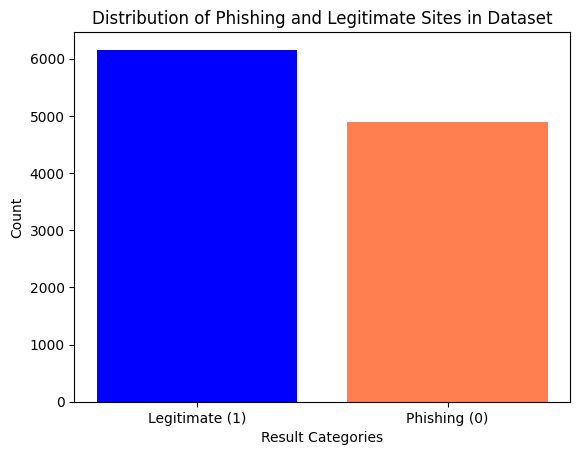

In [10]:
# Count the occurrences of each category in the 'Result' column
result_counts = phishing_data['Result'].value_counts()
print(phishing_data['Result'].value_counts())
# Defining colors for the bar chart based on the index of result_counts
# (assuming -1 for Phishing and 1 for Legitimate)
colors = ['Coral' if index == 0 else 'blue' for index in result_counts.index]

# Define labels for the categories
labels = ['Legitimate (1)','Phishing (0)']

# Create an enhanced bar chart
plt.bar(labels, result_counts.values, color=colors)
plt.xlabel('Result Categories')
plt.ylabel('Count')
plt.title('Distribution of Phishing and Legitimate Sites in Dataset')
plt.show()

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

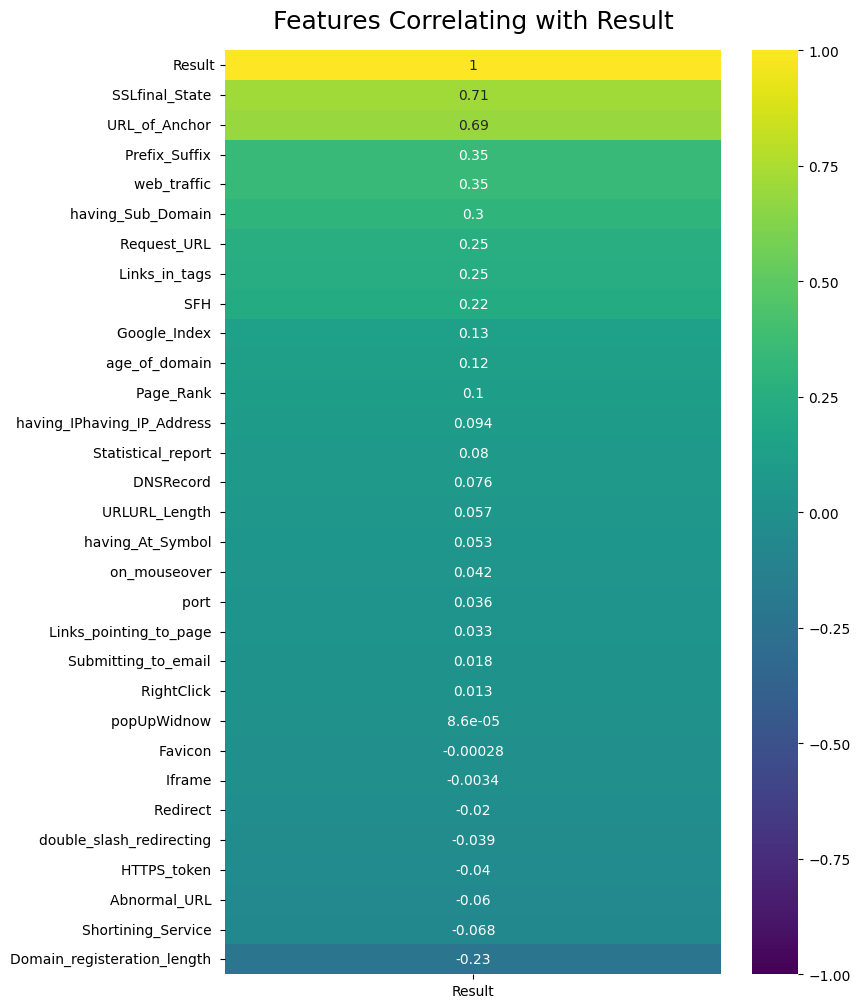

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(phishing_data.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

In [12]:
# Print correlation with target variable
print(phishing_data.corr()['Result'].sort_values())   

Domain_registeration_length    -0.225789
Shortining_Service             -0.067966
Abnormal_URL                   -0.060488
HTTPS_token                    -0.039854
double_slash_redirecting       -0.038608
Redirect                       -0.020113
Iframe                         -0.003394
Favicon                        -0.000280
popUpWidnow                     0.000086
RightClick                      0.012653
Submitting_to_email             0.018249
Links_pointing_to_page          0.032574
port                            0.036419
on_mouseover                    0.041838
having_At_Symbol                0.052948
URLURL_Length                   0.057430
DNSRecord                       0.075718
Statistical_report              0.079857
having_IPhaving_IP_Address      0.094160
Page_Rank                       0.104645
age_of_domain                   0.121496
Google_Index                    0.128950
SFH                             0.221419
Links_in_tags                   0.248229
Request_URL     

In [13]:
# Based on the provided correlation output, let's filter out the features with a correlation less than 0
# and keep one feature from those whose correlation values are between the 2nd and 3rd highest.

# First, we get the features with correlation less than 0 removed
positive_corr_features = phishing_data.columns[phishing_data.corr()['Result'] > 0]

# Create a new DataFrame with only the features to keep
filtered_phishing_data = phishing_data[positive_corr_features]

# Display the first few rows of the filtered DataFrame to verify
filtered_phishing_data.head()


,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,port,Request_URL,URL_of_Anchor,Links_in_tags,...,RightClick,popUpWidnow,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,-1,-1,-1,1,1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,-1,0,1,1,1,0,-1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,-1,-1,-1,1,1,0,-1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,-1,-1,-1,1,-1,0,0,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,1,-1,1,1,1,1,0,0,...,1,-1,-1,-1,0,-1,1,1,1,1


In [14]:
# Print correlation with target variable
print(filtered_phishing_data.corr()['Result'].sort_values())  

popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372
having_Sub_Domain              0.298323
web_traffic                    0.346103
Prefix_Suffix                  0.348606
URL_of_Anchor                  0.692935
SSLfinal_State                 0.714741
Result                         1.000000
Name: Result, dtype: float64


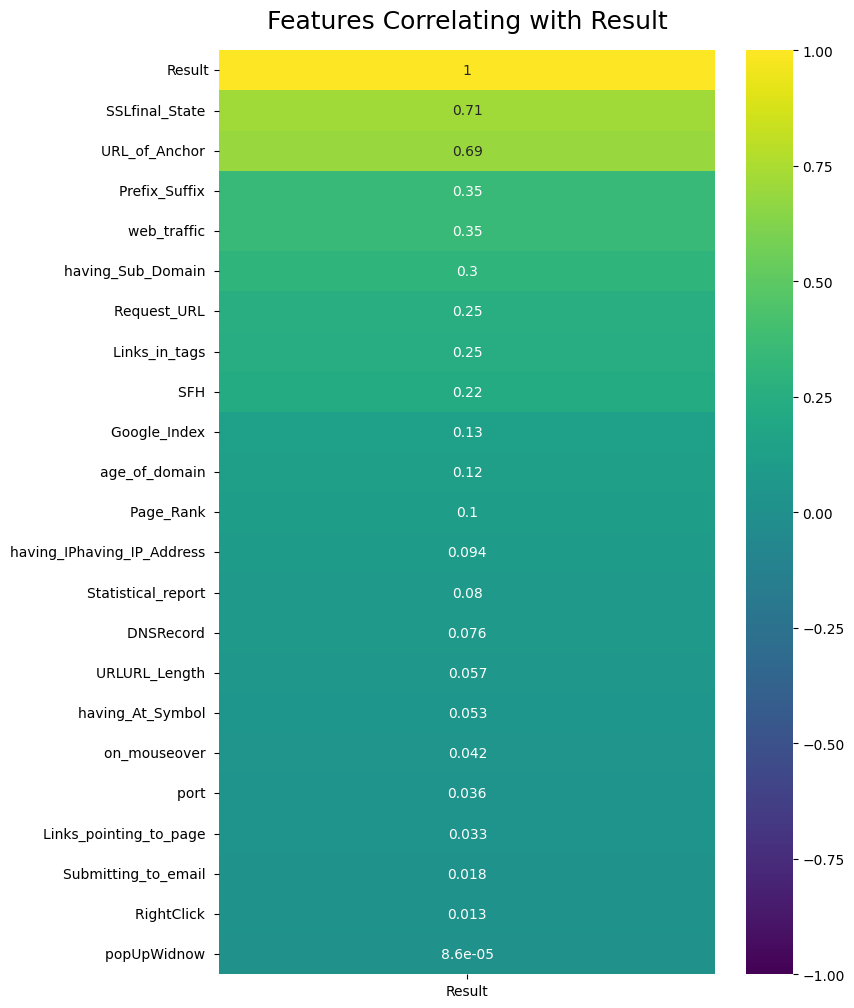

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(filtered_phishing_data.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

# MODELS

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from time import perf_counter

In [17]:
def binary_classification_accuracy(actual, pred):
    print(f'Accuracy score: \n{accuracy_score(actual, pred)}')
    
target = filtered_phishing_data['Result']
features = filtered_phishing_data.drop(columns=['Result'])

# Define the number of splits for KFold
n_splits = 10 
folds = KFold(n_splits=n_splits, shuffle=True, random_state = 2)

# MODEL 01: SVM

In [18]:
accuracy_scores_svm = []
duration_svm =[]

features_array = features.values
target_array = target.values

for fold, (train_idx, validation_idx) in enumerate(folds.split(features_array, target_array)):
    start = perf_counter()
    model = SVC(kernel='rbf', C=10, gamma=0.001)
    model.fit(features_array[train_idx], target_array[train_idx])
    predicted_values = model.predict(features_array[validation_idx])
    
    accuracy = accuracy_score(target[validation_idx], predicted_values)
    accuracy_scores_svm.append(accuracy)

    print(f'==== FOLD {fold+1} ====')
    print(f'Accuracy score: {accuracy}')
    
    duration = perf_counter() - start
    duration_svm.append(duration)


==== FOLD 1 ====
Accuracy score: 0.906871609403255
==== FOLD 2 ====
Accuracy score: 0.9276672694394213
==== FOLD 3 ====
Accuracy score: 0.9222423146473779
==== FOLD 4 ====
Accuracy score: 0.9195298372513563
==== FOLD 5 ====
Accuracy score: 0.918625678119349
==== FOLD 6 ====
Accuracy score: 0.9276018099547512
==== FOLD 7 ====
Accuracy score: 0.9194570135746606
==== FOLD 8 ====
Accuracy score: 0.934841628959276
==== FOLD 9 ====
Accuracy score: 0.9248868778280543
==== FOLD 10 ====
Accuracy score: 0.9330316742081448


In [19]:
accuracy_scores_svm

[0.906871609403255,
 0.9276672694394213,
 0.9222423146473779,
 0.9195298372513563,
 0.918625678119349,
 0.9276018099547512,
 0.9194570135746606,
 0.934841628959276,
 0.9248868778280543,
 0.9330316742081448]

In [20]:
duration_svm

[0.5441592500137631,
 0.5937698750058189,
 0.5429497500008438,
 0.5312274580064695,
 0.5349091659882106,
 0.5445056250027847,
 0.5376579169824254,
 0.5489918329985812,
 0.5340374160150532,
 0.5920622909907252]

# MODEL 02: RANDOM FORREST

In [21]:
accuracy_scores_rf = []
duration_rf =[]

features_array = features.values
target_array = target.values

# Rest of the code for KFold cross-validation remains the same
for fold, (train_idx, validation_idx) in enumerate(folds.split(features_array, target_array)):
    start = perf_counter()
    model = RandomForestClassifier(max_depth=3,max_features='sqrt',min_samples_leaf=2,min_samples_split=5,n_estimators=10, random_state=2)
    model.fit(features_array[train_idx], target_array[train_idx])
    predicted_values = model.predict(features_array[validation_idx])
    
    # Calculate the accuracy score for this fold
    accuracy = accuracy_score(target[validation_idx], predicted_values)
    accuracy_scores_rf.append(accuracy)

    print(f'==== FOLD {fold+1} ====')
    print(f'Accuracy score: {accuracy}')

    duration = perf_counter() - start
    duration_rf.append(duration)


==== FOLD 1 ====
Accuracy score: 0.9122965641952984
==== FOLD 2 ====
Accuracy score: 0.9213381555153707
==== FOLD 3 ====
Accuracy score: 0.9195298372513563
==== FOLD 4 ====
Accuracy score: 0.9222423146473779
==== FOLD 5 ====
Accuracy score: 0.9267631103074141
==== FOLD 6 ====
Accuracy score: 0.934841628959276
==== FOLD 7 ====
Accuracy score: 0.9176470588235294
==== FOLD 8 ====
Accuracy score: 0.9339366515837104
==== FOLD 9 ====
Accuracy score: 0.9194570135746606
==== FOLD 10 ====
Accuracy score: 0.9230769230769231


In [22]:
accuracy_scores_rf

[0.9122965641952984,
 0.9213381555153707,
 0.9195298372513563,
 0.9222423146473779,
 0.9267631103074141,
 0.934841628959276,
 0.9176470588235294,
 0.9339366515837104,
 0.9194570135746606,
 0.9230769230769231]

In [23]:
duration_rf

[0.028993958985665813,
 0.026394667016575113,
 0.021067833004053682,
 0.01765716599766165,
 0.01794220900046639,
 0.017839332984294742,
 0.022508916998049244,
 0.016767082997830585,
 0.015936708019580692,
 0.015625708998413756]

# MODEL 03: XGBOOST

In [24]:
accuracy_scores_xgb = []
duration_xgb =[]
folds = KFold(n_splits=n_splits, shuffle=True, random_state = 4)
for fold, (train_idx, validation_idx) in enumerate(folds.split(features, target)):
    start = perf_counter()
    model = XGBClassifier()
    model.fit(np.array(features)[train_idx,:], np.array(target)[train_idx])
    predicted_values = model.predict(np.array(features)[validation_idx,:])
    
    # calculate the accuracy score for this fold
    accuracy = accuracy_score(np.array(target)[validation_idx], predicted_values)
    accuracy_scores_xgb.append(accuracy)

    print(f'==== FOLD {fold+1} ====')
    binary_classification_accuracy(np.array(target)[validation_idx], predicted_values)
    duration = perf_counter() - start
    duration_xgb.append(duration)



==== FOLD 1 ====
Accuracy score: 
0.9656419529837251
==== FOLD 2 ====
Accuracy score: 
0.976491862567812
==== FOLD 3 ====
Accuracy score: 
0.972875226039783
==== FOLD 4 ====
Accuracy score: 
0.9656419529837251
==== FOLD 5 ====
Accuracy score: 
0.969258589511754
==== FOLD 6 ====
Accuracy score: 
0.9683257918552036
==== FOLD 7 ====
Accuracy score: 
0.9728506787330317
==== FOLD 8 ====
Accuracy score: 
0.9656108597285068
==== FOLD 9 ====
Accuracy score: 
0.9619909502262444
==== FOLD 10 ====
Accuracy score: 
0.9683257918552036


In [25]:
accuracy_scores_xgb

[0.9656419529837251,
 0.976491862567812,
 0.972875226039783,
 0.9656419529837251,
 0.969258589511754,
 0.9683257918552036,
 0.9728506787330317,
 0.9656108597285068,
 0.9619909502262444,
 0.9683257918552036]

In [26]:
duration_xgb

[0.10247499999240972,
 0.055124708014773205,
 0.05227283400017768,
 0.052120541979093105,
 0.05294662501546554,
 0.051326666987733915,
 0.058055166009580716,
 0.06129091698676348,
 0.055862291977973655,
 0.05552075000014156]

## Accuracy of three models together

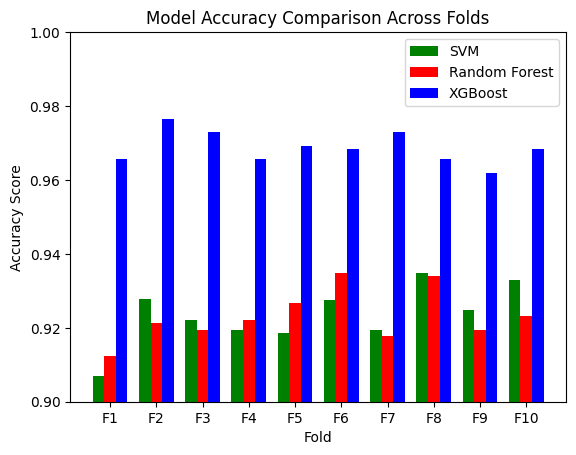

In [27]:
# Number of folds
n_folds = len(accuracy_scores_xgb)

# Creating x locations for the groups on the x-axis
fold_indices = np.arange(n_folds)

# Width of the bars
bar_width = 0.25

# Create a bar plot to display the accuracy scores for each fold
fig, ax = plt.subplots()

# Plotting each model's accuracy scores
ax.bar(fold_indices - bar_width, accuracy_scores_svm, bar_width, label='SVM', color='green')
ax.bar(fold_indices, accuracy_scores_rf, bar_width, label='Random Forest', color='red')
ax.bar(fold_indices + bar_width, accuracy_scores_xgb, bar_width, label='XGBoost', color='blue')

# Adding labels and title
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy Score')
ax.set_title('Model Accuracy Comparison Across Folds')
ax.set_xticks(fold_indices)
ax.set_xticklabels([f'F{i+1}' for i in range(n_folds)])
ax.legend()
# Setting y-axis limits to show accuracy from 0.5 to 1
ax.set_ylim(0.9, 1)
# Display the plot
plt.show()



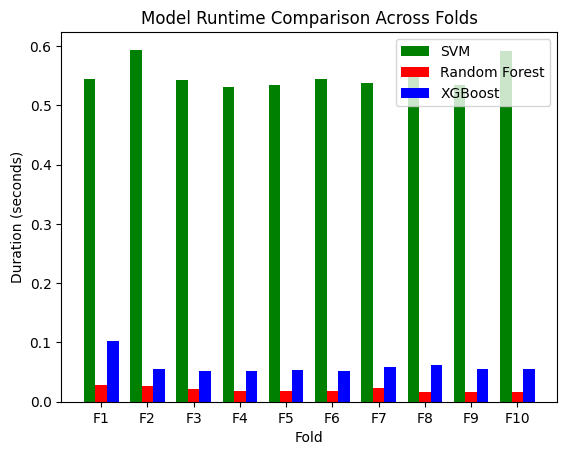

In [28]:
# Number of folds
n_folds = len(duration_svm) 

# Creating x locations for the groups on the x-axis
fold_indices = np.arange(n_folds)

# Width of the bars
bar_width = 0.25

# Create a bar plot to display the duration scores for each fold
fig, ax = plt.subplots()

# Plotting each model's duration scores
ax.bar(fold_indices - bar_width, duration_svm, bar_width, label='SVM', color='green')
ax.bar(fold_indices, duration_rf, bar_width, label='Random Forest', color='red')
ax.bar(fold_indices + bar_width, duration_xgb, bar_width, label='XGBoost', color='blue')

# Adding labels and title
ax.set_xlabel('Fold')
ax.set_ylabel('Duration (seconds)')
ax.set_title('Model Runtime Comparison Across Folds')
ax.set_xticks(fold_indices)
ax.set_xticklabels([f'F{i+1}' for i in range(n_folds)])
ax.legend()

# Display the plot
plt.show()


---

# Anova

In [29]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

F-Statistic: 154.15583878114782, P-Value: 1.6976714978278632e-15
The differences between the models are statistically significant.


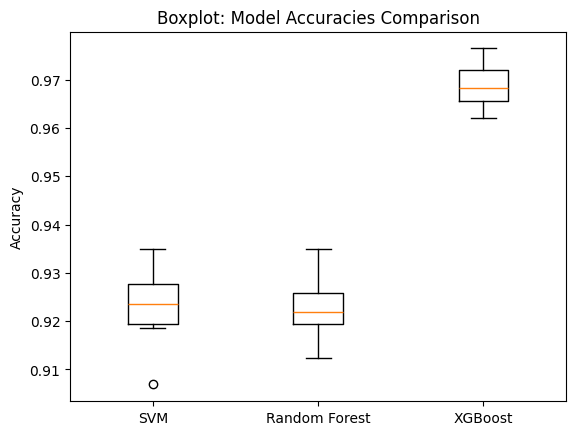

In [30]:
f_statistic, p_value = stats.f_oneway(accuracy_scores_svm, accuracy_scores_rf, accuracy_scores_xgb)
print(f'F-Statistic: {f_statistic}, P-Value: {p_value}')

# Check if the p-value is less than 0.05 to determine if the differences are statistically significant
if p_value < 0.05:
    print("The differences between the models are statistically significant.")
else:
    print("The differences between the models are not statistically significant.")

def calculate_confidence_interval(data):
    mean = np.mean(data)
    std_error = stats.sem(data)
    confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_error)
    return confidence_interval


all_accuracies = [accuracy_scores_svm, accuracy_scores_rf, accuracy_scores_xgb]
plt.boxplot(all_accuracies, labels=['SVM', 'Random Forest', 'XGBoost'])
plt.title('Boxplot: Model Accuracies Comparison')
plt.ylabel('Accuracy')
# plt.xlabel('Model')
plt.show()


In [31]:
ci_svm = calculate_confidence_interval(accuracy_scores_svm)
ci_rf = calculate_confidence_interval(accuracy_scores_rf)
ci_xgb = calculate_confidence_interval(accuracy_scores_xgb)

print(f'Confidence Interval for SVM\t\t: {ci_svm}')
print(f'Confidence Interval for Random Forest\t: {ci_rf}')
print(f'Confidence Interval for XGBoost\t\t: {ci_xgb}')


Confidence Interval for SVM		: (0.9176858144384535, 0.9292653282386759)
Confidence Interval for Random Forest	: (0.9180826444521195, 0.9281432071348639)
Confidence Interval for XGBoost		: (0.9655994386861598, 0.9718032926108381)


---

# Slide example

In [42]:
from scipy import stats
import numpy as np

# Provided accuracies from the screenshots
accuracies_a = np.array([0.9, 0.97, 0.86, 0.72, 0.99, 1.06, 0.77, 1.03, 0.96, 0.88])
accuracies_b = np.array([0.71, 0.79, 0.85, 0.77, 0.74, 0.83, 1.08, 0.68, 0.82, 0.76])
accuracies_c = np.array([0.61, 0.59, 0.63, 0.6, 0.75, 0.73, 0.63, 0.56, 0.75, 0.69])

# Calculate the means for each algorithm
mean_a = np.mean(accuracies_a)
mean_b = np.mean(accuracies_b)
mean_c = np.mean(accuracies_c)

# Total mean across all algorithms
total_mean = np.mean([mean_a, mean_b, mean_c])

# Calculate effects for each algorithm
effect_a = mean_a - total_mean
effect_b = mean_b - total_mean
effect_c = mean_c - total_mean

print(f'Mean for Algorithm A\t: {mean_a}')
print(f'Mean for Algorithm B\t: {mean_b}')
print(f'Mean for Algorithm C\t: {mean_c}')
print(f'Total Mean\t\t: {total_mean}')
print(f'Effect for Algorithm A\t: {effect_a}')
print(f'Effect for Algorithm B\t: {effect_b}')
print(f'Effect for Algorithm C\t: {effect_c}')

Mean for Algorithm A	: 0.914
Mean for Algorithm B	: 0.8030000000000002
Mean for Algorithm C	: 0.6539999999999999
Total Mean		: 0.7903333333333333
Effect for Algorithm A	: 0.1236666666666667
Effect for Algorithm B	: 0.012666666666666826
Effect for Algorithm C	: -0.13633333333333342


In [43]:
# Number of algorithms and number of observations per algorithm
k = 3  # Number of algorithms
n = len(accuracies_a)  # Number of observations per algorithm

# Sum of Squares for Algorithms (SSA)
ssa = n * (effect_a**2 + effect_b**2 + effect_c**2)

# Total Sum of Squares (SST)
sst = np.sum((accuracies_a - total_mean)**2) + np.sum((accuracies_b - total_mean)**2) + np.sum((accuracies_c - total_mean)**2)

# Percentage of variation due to algorithms
percentage_variation_algorithms = (ssa / sst) * 100

# Sum of Squares for Error (SSE)
sse = sst - ssa

# Percentage of variation due to errors/noise
percentage_variation_errors = (sse / sst) * 100

# Variance estimates
variance_a = ssa / (k - 1)
variance_e = sse / (k * (n - 1))

# F-statistic
f_statistic = variance_a / variance_e

# F-critical from ANOVA table for alpha = 0.01, (2, 27) degrees of freedom
f_critical = stats.f.ppf(1 - 0.01, dfn=k-1, dfd=k*(n-1))
print(f'F-Statistic: {f_statistic}, f_critical: {f_critical}')

# Check if F-statistic is greater than F-critical
if f_statistic > f_critical:
    print("The differences among the algorithms are statistically significant at α = 0.01.")
else:
    print("The differences among the algorithms are not statistically significant at α = 0.01.")




F-Statistic: 17.42762334559525, f_critical: 5.488117768420701
The differences among the algorithms are statistically significant at α = 0.01.


In [44]:
# Weights for each comparison (provided effects)
weights_ab = np.array([1, -1, 0])
weights_bc = np.array([0, 1, -1])
weights_ac = np.array([1, 0, -1])

# Calculate contrasts
contrast_ab = effect_a - effect_b
contrast_bc = effect_b - effect_c
contrast_ac = effect_a - effect_c

# Calculate the standard error
se = np.sqrt(sse / (k * (n - 1)))

# Calculate contrast standard errors
sc_ab = np.sqrt((weights_ab[0]**2 + weights_ab[1]**2) * se**2 / (k*n))
sc_bc = np.sqrt((weights_bc[1]**2 + weights_bc[2]**2) * se**2 / (k*n))
sc_ac = np.sqrt((weights_ac[0]**2 + weights_ac[2]**2) * se**2 / (k*n))

# Critical t-value for alpha = 0.01 with 27 degrees of freedom (two-tailed)
t_critical = stats.t.ppf(1 - 0.01/2, df=k*(n-1))

# Calculate confidence intervals for each contrast
ci_ab = (contrast_ab - t_critical * sc_ab, contrast_ab + t_critical * sc_ab)
ci_bc = (contrast_bc - t_critical * sc_bc, contrast_bc + t_critical * sc_bc)
ci_ac = (contrast_ac - t_critical * sc_ac, contrast_ac + t_critical * sc_ac)

# Print the results
print(t_critical)
print(f'Constrast A vs B: {contrast_ab}')
print(f'Constrast B vs C: {contrast_bc}')
print(f'Constrast A vs C: {contrast_ac}')
print(f'SC A vs B\t: {sc_ab}')
print(f'SC B vs C\t: {sc_bc}')
print(f'SC A vs C\t: {sc_bc}')
print(f'Confidence Interval for A vs B: {ci_ab}')
print(f'Confidence Interval for B vs C: {ci_bc}')
print(f'Confidence Interval for A vs C: {ci_ac}')

2.7706829571216756
Constrast A vs B: 0.11099999999999988
Constrast B vs C: 0.14900000000000024
Constrast A vs C: 0.2600000000000001
SC A vs B	: 0.02551639511673006
SC B vs C	: 0.02551639511673006
SC A vs C	: 0.02551639511673006
Confidence Interval for A vs B: (0.040302158922893155, 0.1816978410771066)
Confidence Interval for B vs C: (0.07830215892289352, 0.21969784107710696)
Confidence Interval for A vs C: (0.1893021589228934, 0.33069784107710687)


# For my project

In [36]:
from scipy import stats
import numpy as np

# Provided accuracies from the screenshots
accuracies_a = accuracy_scores_svm
accuracies_b = accuracy_scores_rf
accuracies_c = accuracy_scores_xgb

# Calculate the means for each algorithm
mean_a = np.mean(accuracies_a)
mean_b = np.mean(accuracies_b)
mean_c = np.mean(accuracies_c)

# Total mean across all algorithms
total_mean = np.mean([mean_a, mean_b, mean_c])

# Calculate effects for each algorithm
effect_a = mean_a - total_mean
effect_b = mean_b - total_mean
effect_c = mean_c - total_mean

print(f'Mean for Algorithm A\t: {mean_a}')
print(f'Mean for Algorithm B\t: {mean_b}')
print(f'Mean for Algorithm C\t: {mean_c}')
print(f'Total Mean\t\t: {total_mean}')
print(f'Effect for Algorithm A\t: {effect_a}')
print(f'Effect for Algorithm B\t: {effect_b}')
print(f'Effect for Algorithm C\t: {effect_c}')

Mean for Algorithm A	: 0.9234755713385647
Mean for Algorithm B	: 0.9231129257934917
Mean for Algorithm C	: 0.968701365648499
Total Mean		: 0.9384299542601852
Effect for Algorithm A	: -0.014954382921620435
Effect for Algorithm B	: -0.015317028466693472
Effect for Algorithm C	: 0.030271411388313796


In [37]:
# Number of algorithms and number of observations per algorithm
k = 3  # Number of algorithms
n = len(accuracies_a)  # Number of observations per algorithm

# Sum of Squares for Algorithms (SSA)
ssa = n * (effect_a**2 + effect_b**2 + effect_c**2)

# Total Sum of Squares (SST)
sst = np.sum((accuracies_a - total_mean)**2) + np.sum((accuracies_b - total_mean)**2) + np.sum((accuracies_c - total_mean)**2)

# Percentage of variation due to algorithms
percentage_variation_algorithms = (ssa / sst) * 100

# Sum of Squares for Error (SSE)
sse = sst - ssa

# Percentage of variation due to errors/noise
percentage_variation_errors = (sse / sst) * 100

# Variance estimates
variance_a = ssa / (k - 1)
variance_e = sse / (k * (n - 1))

# F-statistic
f_statistic = variance_a / variance_e

# F-critical from ANOVA table for alpha = 0.01, (2, 27) degrees of freedom
f_critical = stats.f.ppf(1 - 0.01, dfn=k-1, dfd=k*(n-1))
print(f'F-Statistic: {f_statistic}, f_critical: {f_critical}')

# Check if F-statistic is greater than F-critical
if f_statistic > f_critical:
    print("The differences among the algorithms are statistically significant at α = 0.01.")
else:
    print("The differences among the algorithms are not statistically significant at α = 0.01.")

F-Statistic: 154.1558387811466, f_critical: 5.488117768420701
The differences among the algorithms are statistically significant at α = 0.01.


In [39]:
# Weights for each comparison (provided effects)
weights_ab = np.array([1, -1, 0])
weights_bc = np.array([0, 1, -1])
weights_ac = np.array([1, 0, -1])

# Calculate contrasts
contrast_ab = effect_a - effect_b
contrast_bc = effect_b - effect_c
contrast_ac = effect_a - effect_c

# Calculate the standard error
se = np.sqrt(sse / (k * (n - 1)))

# Calculate contrast standard errors
sc_ab = np.sqrt((weights_ab[0]**2 + weights_ab[1]**2) * se**2 / (k*n))
sc_bc = np.sqrt((weights_bc[1]**2 + weights_bc[2]**2) * se**2 / (k*n))
sc_ac = np.sqrt((weights_ac[0]**2 + weights_ac[2]**2) * se**2 / (k*n))

# Critical t-value for alpha = 0.01 with 27 degrees of freedom (two-tailed)
t_critical = stats.t.ppf(1 - 0.1/2, df=k*(n-1))

# Calculate confidence intervals for each contrast
ci_ab = (contrast_ab - t_critical * sc_ab, contrast_ab + t_critical * sc_ab)
ci_bc = (contrast_bc - t_critical * sc_bc, contrast_bc + t_critical * sc_bc)
ci_ac = (contrast_ac - t_critical * sc_ac, contrast_ac + t_critical * sc_ac)

# Print the results
print(t_critical)
print(f'Constrast A vs B: {contrast_ab}')
print(f'Constrast B vs C: {contrast_bc}')
print(f'Constrast A vs C: {contrast_ac}')
print(f'SC A vs B\t: {sc_ab}')
print(f'SC B vs C\t: {sc_bc}')
print(f'SC A vs C\t: {sc_bc}')
print(f'Confidence Interval for A vs B: {ci_ab}')
print(f'Confidence Interval for B vs C: {ci_bc}')
print(f'Confidence Interval for A vs C: {ci_ac}')

1.7032884457221265
Constrast A vs B: 0.00036264554507303703
Constrast B vs C: -0.04558843985500727
Constrast A vs C: -0.04522579430993423
SC A vs B	: 0.0017240429097356471
SC B vs C	: 0.0017240429097356471
SC A vs C	: 0.0017240429097356471
Confidence Interval for A vs B: (-0.0025738968230088455, 0.0032991879131549196)
Confidence Interval for B vs C: (-0.04852498222308915, -0.04265189748692538)
Confidence Interval for A vs C: (-0.048162336678016116, -0.042289251941852346)
